边缘检测

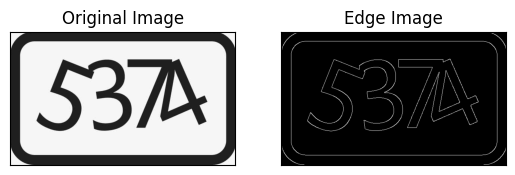

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt

"""
第一个参数是我们的输入图像。
第二个和第三个参数分别是我们的minVal和maxVal。
"""

img = cv.imread('../images/captcha.png', 0)
edges = cv.Canny(img, 100, 200)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
# 等比例缩放显示
def show_frame(frame):
    # 获取图像的宽度和高度
    height, width = frame.shape[:2]

    # 设置希望的缩放宽度
    desired_width = 400

    # 计算缩放比例，确保等比例缩放
    scale_factor = desired_width / width

    # 计算缩放后的新高度
    desired_height = int(height * scale_factor)

    # 缩放图像
    resized_image = cv.resize(frame, (desired_width, desired_height))
    return resized_image

## 边缘提取

In [9]:
# imread()两个参数：
# 1、图片路径。
# 2、读取图片的形式（1：默认值，加载彩色图片。 0：加载灰度图片。 -1：加载原图片）
img = cv.imread(r"../images/R-C (1).png")
cv.imshow('img', show_frame(img))

ret1, thresh1 = cv.threshold(img, 80, 255, cv.THRESH_BINARY)  # 阈值分割，黑白二值
ret2, thresh2 = cv.threshold(thresh1, 80, 255, cv.THRESH_BINARY_INV)  # （黑白二值反转）

cv.imshow('img1', show_frame(thresh1))
cv.imshow('img2', show_frame(thresh2))

# Canny算子是双阈值，所以需要指定两个阈值，阈值越小，边缘越丰富。
img3 = cv.Canny(img, 80, 255)

cv.imshow('img3', show_frame(img3))

# 对img3图像进行反转
img4 = cv.bitwise_not(img3)
cv.imshow('img4', show_frame(img4))

cv.waitKey()
cv.destroyAllWindows()